In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,  VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from scipy.stats import norm
import warnings
# %matplotlib notebook

In [2]:
df = pd.read_csv('Adult Train.csv')
df

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Research Question
Design a model to be able to accurately classify users into two income categories " <=50k " and " >50k " = {0, 1:}

In [3]:
df_us = df[df['native-country'] == ' United-States']
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_us = df_us.drop(columns=['capital-loss', 'capital-gain', 'native-country'])
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [5]:
df_us = df_us[df_us['Occupation'] != ' ?']
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [6]:
df_us.describe()

,Age,hours-per-week
count,27504.000000,27504.000000
mean,38.504290,40.970986
std,13.184357,12.041120
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


In [7]:
df_us.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Sales', ' Farming-fishing',
       ' Machine-op-inspct', ' Other-service', ' Transport-moving',
       ' Tech-support', ' Craft-repair', ' Protective-serv',
       ' Armed-Forces', ' Priv-house-serv'], dtype=object)

In [8]:
df_us.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
df_us['Occupation'].value_counts()

 Exec-managerial      3735
 Prof-specialty       3693
 Craft-repair         3685
 Adm-clerical         3449
 Sales                3364
 Other-service        2777
 Machine-op-inspct    1687
 Transport-moving     1491
 Handlers-cleaners    1189
 Farming-fishing       879
 Tech-support          850
 Protective-serv       606
 Priv-house-serv        90
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

ValueError: Could not interpret input 'Sex'

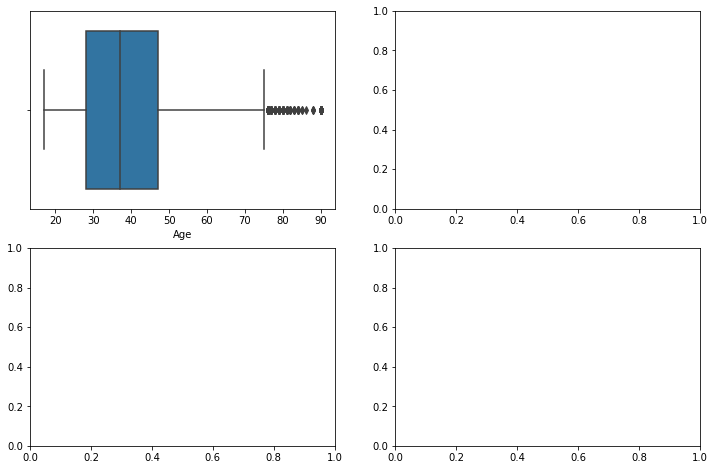

In [83]:
fig, axs = plt.subplots(2,2, figsize = (12,8))
sns.boxplot(ax = axs[0,0], x = 'Age', data = df_us)
sns.countplot(ax = axs[0,1], x = 'Sex', data = df_us)
sns.countplot(ax = axs[1,0], x = 'Education', data = df_us)
sns.countplot(ax = axs[1,1], x = 'Income', data = df_us)
axs[1,0].tick_params(axis="x", rotation=90)
plt.title('Little Visualization of the dataset')

In [21]:
le = LabelEncoder()

In [22]:
 # Age	Workclass	Education	Marital Status	Occupation	Relationship	Race	Sex
df_us['Workclass_label'] = le.fit_transform(df_us['Workclass'])
df_us['Education_label'] = le.fit_transform(df_us['Education'])
df_us['Marital Status_label'] = le.fit_transform(df_us['Marital Status'])
df_us['Occupation_label'] = le.fit_transform(df_us['Occupation'])
df_us['Relationship_label'] = le.fit_transform(df_us['Relationship'])
df_us['Race_label'] = le.fit_transform(df_us['Race'])
df_us['Sex_label'] = le.fit_transform(df_us['Sex'])
df_us['Income_label'] = le.fit_transform(df_us['Income'])
df_us

C:\Users\user\AppData\Local\Temp\ipykernel_11764\2183002084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Workclass_label'] = le.fit_transform(df_us['Workclass'])
C:\Users\user\AppData\Local\Temp\ipykernel_11764\2183002084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Education_label'] = le.fit_transform(df_us['Education'])
C:\Users\user\AppData\Local\Temp\ipykernel_11764\2183002084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income,Workclass_label,Education_label,Marital Status_label,Occupation_label,Relationship_label,Race_label,Sex_label,Income_label
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,5,9,4,0,1,4,1,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,4,9,2,3,0,4,1,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,2,11,0,5,1,4,1,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,2,1,2,5,0,2,1,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K,2,12,2,3,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K,2,7,2,12,5,4,0,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K,2,11,2,6,0,4,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K,2,11,6,0,4,4,0,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K,2,11,4,0,3,4,1,0


In [23]:
 lookup_Workclass_name = dict(zip(df_us.Workclass_label.unique(), df_us.Workclass.unique()))
lookup_Education_name = dict(zip(df_us.Education_label.unique(), df_us.Education.unique()))
lookup_Marital_Status_name = dict(zip(df_us['Marital Status_label'].unique(), df_us['Marital Status'].unique())) 
lookup_Occupation_name = dict(zip(df_us.Occupation_label.unique(), df_us.Occupation.unique()))
lookup_Relationship_name = dict(zip(df_us.Relationship_label.unique(), df_us.Relationship.unique()))
lookup_Race_name = dict(zip(df_us.Race_label.unique(), df_us.Race.unique())) 
lookup_Sex_name = dict(zip(df_us.Sex_label.unique(), df_us.Sex.unique()))
lookup_Income_name = dict(zip(df_us.Income_label.unique(), df_us.Income.unique()))
lookup_Income_name

{0: ' <=50K', 1: ' >50K'}

In [24]:
columns_to_drop = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income']

In [25]:
df_us = df_us.drop(columns=columns_to_drop)
df_us

,Age,hours-per-week,Workclass_label,Education_label,Marital Status_label,Occupation_label,Relationship_label,Race_label,Sex_label,Income_label
0,39,40,5,9,4,0,1,4,1,0
1,50,13,4,9,2,3,0,4,1,0
2,38,40,2,11,0,5,1,4,1,0
3,53,40,2,1,2,5,0,2,1,0
5,37,40,2,12,2,3,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,38,2,7,2,12,5,4,0,0
32557,40,40,2,11,2,6,0,4,1,1
32558,58,40,2,11,6,0,4,4,0,0
32559,22,20,2,11,4,0,3,4,1,0


Text(0.5, 1.0, 'Correlation among the variables')

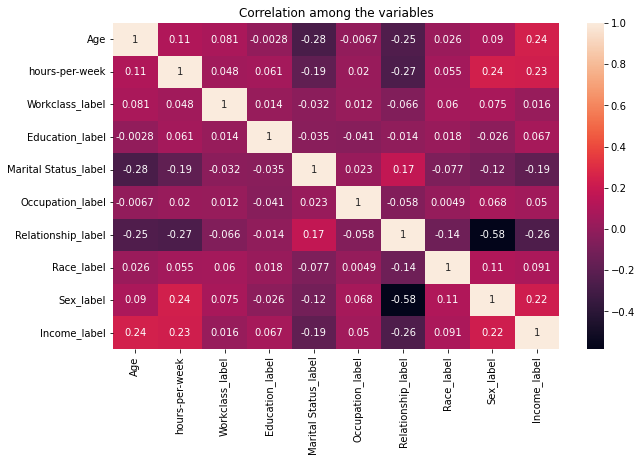

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_us.corr(), annot=True).set_title('Correlation among the variables')

<Figure size 432x288 with 0 Axes>

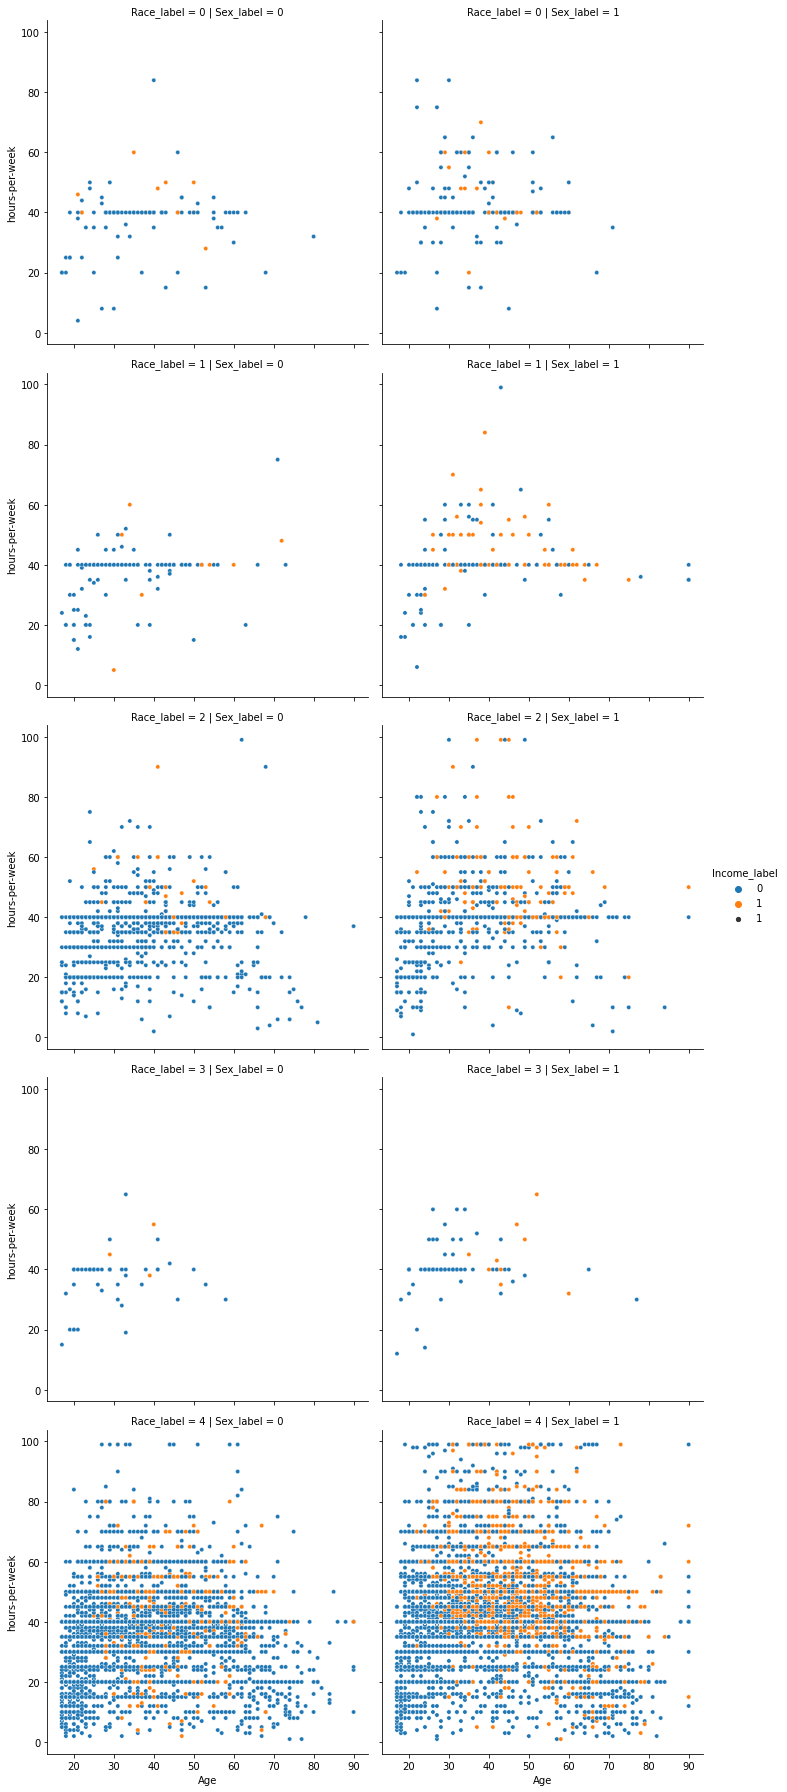

In [27]:
plt.figure()
sns.relplot(x='Age', y='hours-per-week', data=df_us, kind='scatter', col='Sex_label', row='Race_label', hue='Income_label', size=1)

In [28]:
X = df_us.drop(columns=['Income_label']).values
X

array([[39, 40,  5, ...,  1,  4,  1],
       [50, 13,  4, ...,  0,  4,  1],
       [38, 40,  2, ...,  1,  4,  1],
       ...,
       [58, 40,  2, ...,  4,  4,  0],
       [22, 20,  2, ...,  3,  4,  1],
       [52, 40,  3, ...,  5,  4,  0]], dtype=int64)

In [29]:
y = df_us[['Income_label']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

## Design Goal
This model is mainly interested in accuracy, hence the model eveluation is based on its accuracy.

### Select optimal hyperparameters to give best accuracy for the selected models

In [31]:
models_list = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

In [32]:
model_hyperparameters = {
    
    'KNN_hyp' : {
        'n_neighbors' : [8,10,12,14]
    },
    'dec_tree_hyp' : {
        'max_depth' : [6,8,9,10],
    },
#     'svc_hyp' : {
#         'C' : [5,10,20,50,100],
#         'gamma': [0.10, 1.00,10.00,20.00]
#     }
#     ,
    'random_forest_hyp' : {
        'n_estimators' : [500, 600,700,800],
        'max_features' : [2,3]
    }
}

In [33]:
model_keys= list(model_hyperparameters.keys())
print(model_keys)

['KNN_hyp', 'dec_tree_hyp', 'random_forest_hyp']


In [34]:
def model_selection(list_of_models,hyperparametrs_dictionary):
    
    result = []
    i = 0
    
    for model in list_of_models:
        key = model_keys[i]
        params = hyperparametrs_dictionary[key]
        i+=1
        
        print(model)
        print(params)
        print('---------------------------------------------')
        
        classifier = GridSearchCV(model, params, cv=5)
        
        # fitting the data to classifier
        
        classifier.fit(X,y.ravel())
        result.append({
            'model used': model,
            'highest score' : classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [35]:
model_selection(models_list, model_hyperparameters)

KNeighborsClassifier()
{'n_neighbors': [8, 10, 12, 14]}
---------------------------------------------
DecisionTreeClassifier()
{'max_depth': [6, 8, 9, 10]}
---------------------------------------------
RandomForestClassifier()
{'n_estimators': [500, 600, 700, 800], 'max_features': [2, 3]}
---------------------------------------------


,model used,highest score,best hyperparameters
0,KNeighborsClassifier(),0.790976,{'n_neighbors': 12}
1,DecisionTreeClassifier(),0.820099,{'max_depth': 8}
2,RandomForestClassifier(),0.813373,"{'max_features': 2, 'n_estimators': 800}"


## USING KNEIGHBORS CLASSIFIER

In [37]:
knc = KNeighborsClassifier(n_neighbors = 12).fit(X_train, y_train.ravel())

In [38]:
knc_pred = knc.predict(X_test)

In [39]:
print('R-squared test score: {:.3f}'
     .format(knc.score(X_test, y_test)))

R-squared test score: 0.792


In [40]:
print('R-squared test score: {:.3f}'
     .format(knc.score(X_train, y_train)))

R-squared test score: 0.821


In [41]:
cv_scores = cross_val_score(knc,X_train, y_train.ravel())

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.77968977 0.78889966 0.7809016  0.78569697 0.77890909]
Mean cross-validation score (3-fold): 0.783


## Dummy Classifier result

In [42]:
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
dummy_majority.score(X_test, y_test)

0.7427283304246655

In [44]:
y_majority_predicted = dummy_majority.predict(X_test)
dum_confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', dum_confusion)

Most frequent class (dummy classifier)
 [[5107    0]
 [1769    0]]


### KNEIGHBORS Evaluation

In [45]:
knc_confusion = confusion_matrix(y_test, knc_pred)

print('KNN Classifier result \n', knc_confusion)

KNN Classifier result 
 [[4600  507]
 [ 920  849]]


In [46]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, knc_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, knc_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, knc_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, knc_pred)))

Accuracy: 0.79
Precision: 0.63
Recall: 0.48
F1: 0.54


## Decision tree classification

In [47]:
dtc = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train.ravel())

In [48]:
dtc_predicted = dtc.predict(X_test)

### Decision tree evaluation

In [49]:
dtc_confusion = confusion_matrix(y_test, dtc_predicted)

print('Decission tree classifier (max_dept : 8)\n', dtc_confusion)
dtc.score(X_test, y_test)

Decission tree classifier (max_dept : 8)
 [[4683  424]
 [ 803  966]]


0.8215532286212914

In [50]:
pred_train = dtc.predict(X_train)
dtc_confusion = confusion_matrix(y_train, pred_train)
print('Decission tree classifier (max_dept : 8)\n', dtc_confusion)
dtc.score(X_train, y_train)

Decission tree classifier (max_dept : 8)
 [[14148  1254]
 [ 2205  3021]]


0.8323152995927865

## Random forest classification

In [51]:
rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train.ravel())

In [52]:
rfc_predicted = rfc.predict(X_test)

### Random forest Evaluation

In [53]:
rfc_confusion = confusion_matrix(y_test, rfc_predicted)

print('Decission tree classifier (max_dept : 8)\n', rfc_confusion)
rfc.score(X_test, y_test)

Decission tree classifier (max_dept : 8)
 [[4630  477]
 [ 819  950]]


0.8115183246073299

In [54]:
pred_train = rfc.predict(X_train)
rfc_confusion = confusion_matrix(y_train, pred_train)
print('Random forest classifier (n_estimators : 1000)\n', rfc_confusion)
rfc.score(X_train, y_train)

Decission tree classifier (max_dept : 8)
 [[15122   280]
 [  378  4848]]


0.968101609462866

#### The random forrest model overfit the model

## USING VOTING ENSEMBLE TO GET THE BEST MODEL 

In [55]:
estimators = [("decision",dtc),("KNeighbors", knc)]

In [56]:
vc = VotingClassifier(estimators=estimators, voting="soft")

In [58]:
vc.fit(X_train, y_train.ravel())

VotingClassifier(estimators=[('decision', DecisionTreeClassifier(max_depth=8)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_neighbors=12))],
                 voting='soft')

In [59]:
vc_pred = vc.predict(X_test)
vc_pred

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF VOTING CLASSIFIER
print(classification_report(y_test,vc_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5107
           1       0.69      0.56      0.62      1769

    accuracy                           0.82      6876
   macro avg       0.77      0.74      0.75      6876
weighted avg       0.81      0.82      0.81      6876



## USING BAGGING ENSEMBLE

In [65]:
bc = BaggingClassifier(base_estimator = dtc, n_estimators=100).fit(X_train, y_train.ravel())

In [66]:
bc_pred = bc.predict(X_test)

In [67]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF BAGGING CLASSIFIER
print(classification_report(y_test,bc_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5107
           1       0.70      0.56      0.62      1769

    accuracy                           0.83      6876
   macro avg       0.78      0.74      0.75      6876
weighted avg       0.82      0.83      0.82      6876



## USING STACKING ENSEMBLE

In [69]:
sc = StackingClassifier(estimators=estimators, final_estimator = dtc).fit(X_train, y_train.ravel())

In [70]:
sc_pred = sc.predict(X_test)
sc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF STACKING CLASSIFIER
print(classification_report(y_test,sc_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5107
           1       0.72      0.47      0.57      1769

    accuracy                           0.82      6876
   macro avg       0.78      0.70      0.72      6876
weighted avg       0.80      0.82      0.80      6876



## USING GRADIENT BOOSTING CLASSIFIER

In [72]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [73]:
gbc.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [74]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF GRADIENT BOOSTING CLASSIFIER
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5107
           1       0.74      0.57      0.64      1769

    accuracy                           0.84      6876
   macro avg       0.80      0.75      0.77      6876
weighted avg       0.83      0.84      0.83      6876



## USING VOTING ENSEMBLE TO GET THE BEST MODEL

In [76]:
estimators = [("Voting", vc), ("Bagging", bc), ("Stacking", sc), ("Gradient", gbc)]

In [77]:
vc = VotingClassifier(estimators=estimators, voting="hard")

In [78]:
vc.fit(X_train, y_train.ravel())

VotingClassifier(estimators=[('Voting',
                              VotingClassifier(estimators=[('decision',
                                                            DecisionTreeClassifier(max_depth=8)),
                                                           ('KNeighbors',
                                                            KNeighborsClassifier(n_neighbors=12))],
                                               voting='soft')),
                             ('Bagging',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                                                n_estimators=100)),
                             ('Stacking',
                              StackingClassifier(estimators=[('decision',
                                                              DecisionTreeClassifier(max_depth=8)),
                                                             ('KNeighbors',
                                                   

In [79]:
final_pred = vc.predict(X_test)
final_pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF VOTING CLASSIFIER
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5107
           1       0.73      0.51      0.60      1769

    accuracy                           0.83      6876
   macro avg       0.79      0.72      0.74      6876
weighted avg       0.82      0.83      0.81      6876

